In [70]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from pandas import DataFrame
X, y = datasets.load_diabetes(return_X_y=True)
X, y = DataFrame(X), DataFrame(y)


pandas.core.frame.DataFrame

1)


In [79]:
X_train, X_test, y_train, y_test = X.iloc[0:342][2], X.iloc[342:442][2], y.iloc[0:342], y.iloc[342:442]
SLR = LinearRegression().fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1, 1))
print("COEFSS : ", SLR.coef_)

COEFSS :  [[953.3606272]]


In [93]:
SLR_TRAIN_PRED = SLR.predict(X_train.values.reshape(-1,1))

SLR_TEST_PRED = SLR.predict(X_test.values.reshape(-1,1))
error_test = sum((SLR_TEST_PRED - y_test.values)**2)/ len(SLR_TEST_PRED)
error_train = sum((SLR_TRAIN_PRED - y_train.values)**2)/ len(SLR_TRAIN_PRED)

print("MSE TEST: ", error_test)
print("MSE TRAIN: ", error_train)

MSE TEST:  [3752.76943474]
MSE TRAIN:  [3930.78755528]


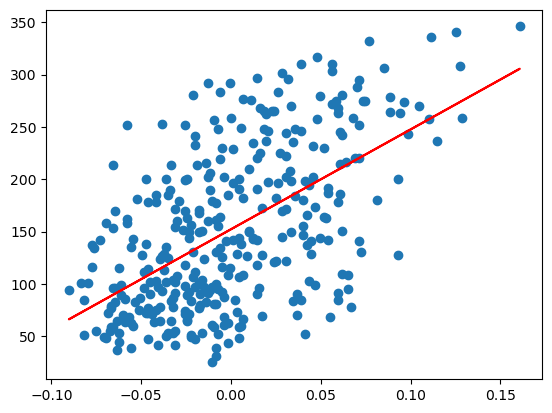

In [98]:
plt.scatter(X_train,y_train)
plt.plot(X_train, SLR_TRAIN_PRED, color='r')

2)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [101]:
LR = LinearRegression().fit(X_train, y_train)
print("COEFS : ", LR.coef_)

COEFS :  [[ -47.08998082 -170.16355255  532.61226835  337.36124659 -679.90733263
   452.27181564   37.81962883   50.10601711  723.0387114   116.92085381]]


In [111]:
LR_PREDIC_TEST = LR.predict(X_test)
MSE = sum((LR_PREDIC_TEST - y_test.values)**2)/ len(LR_PREDIC_TEST)
print("MSE : ", MSE)

MSE :  [3041.2208781]


3)


[3, 2, 1, 0, -1, -2, -3, -4, -5, -6]
[3041.22375978]


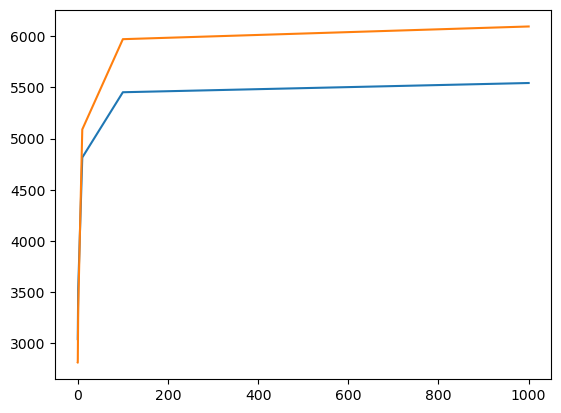

In [128]:
alphas = [i for i in range(3,-7,-1)]
print(alphas)
RG = [Ridge(alpha=10**a).fit(X_train, y_train) for a in alphas]
RG_PREDICT_TEST = [RG[i].predict(X_test) for i in range(len(RG))]
RG_PREDICT_TRAIN = [RG[i].predict(X_train) for i in range(len(RG))]
RG_MSE_TEST = [sum((RG_PREDICT_TEST[i] - y_test.values)**2)/ len(RG_PREDICT_TEST[i]) for i in range(len(RG))]
RG_MSE_TRAIN = [sum((RG_PREDICT_TRAIN[i] - y_train.values)**2)/ len(RG_PREDICT_TRAIN[i]) for i in range(len(RG))]

plt.plot([10**a for a in alphas], [RG_MSE_TEST][0])
plt.plot([10**a for a in alphas], [RG_MSE_TRAIN][0])
print(min(RG_MSE_TEST))

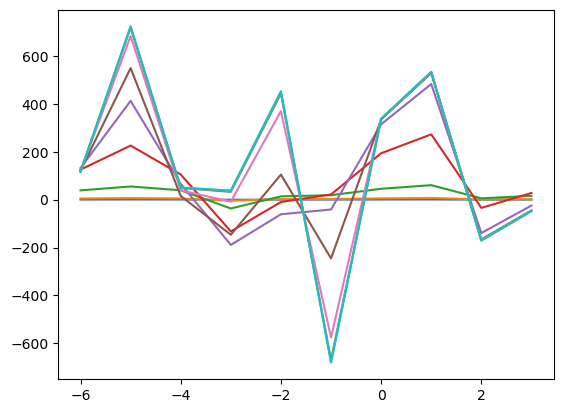

In [135]:

COEFS = [i.coef_ for i in RG]

for i in range(len(COEFS)):
    plt.plot(alphas, COEFS[i][0])

4)

In [156]:
alphas = [i for i in range(3,-7,-1)]
print(alphas)
LSR = [Lasso(alpha=10**a).fit(X_train, y_train) for a in alphas]


[3, 2, 1, 0, -1, -2, -3, -4, -5, -6]


In [157]:
LSR_PREDICT_TEST = [LSR[i].predict(X_test) for i in range(len(LSR))]
LSR_PREDICT_TRAIN = [LSR[i].predict(X_train) for i in range(len(LSR))]


In [163]:
LSR_MSE_TEST = [((LSR_PREDICT_TEST[i] - y_test.values)**2).sum()/ len(LSR_PREDICT_TEST[i]) for i in range(len(LSR))]
LSR_MSE_TRAIN = [((LSR_PREDICT_TRAIN[i] - y_train.values)**2).sum()/ len(LSR_PREDICT_TRAIN[i]) for i in range(len(LSR))]



[738494.0675003403,
 738494.0675003403,
 738494.0675003403,
 828220.3007220675,
 1026655.4577831861,
 1064005.6091065411,
 1072508.9679259814,
 1073493.8973522848,
 1073595.9813298369,
 1073606.2266744357]

[3041.22375978]


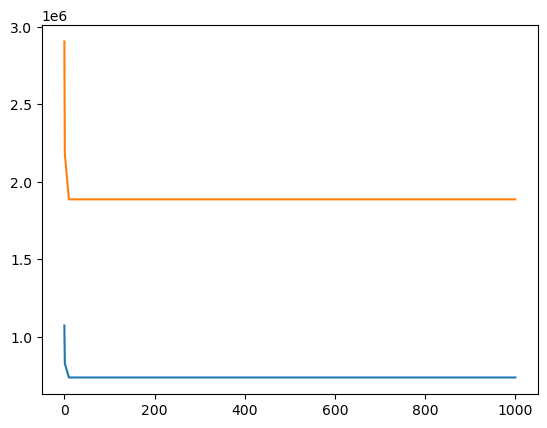

In [165]:
plt.plot([10**a for a in alphas], [LSR_MSE_TEST][0])
plt.plot([10**a for a in alphas], [LSR_MSE_TRAIN][0])
print(min(RG_MSE_TEST))

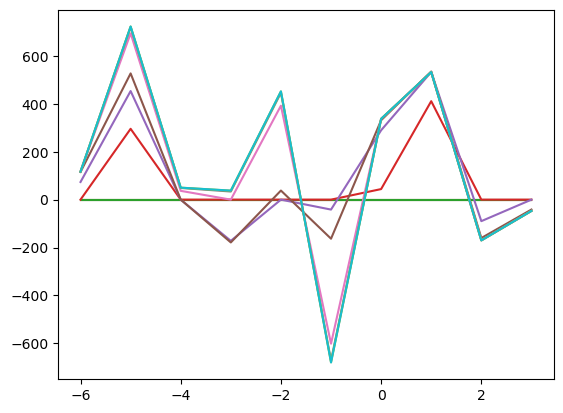

In [167]:
COEFS = [i.coef_ for i in LSR]

for i in range(len(COEFS)):
    plt.plot(alphas, COEFS[i])